In [1]:
path = "/content/drive/My Drive/FNC/dataset/fake news detection(FakeNewsNet)"

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train = pd.read_csv(path + "/fnn_train.csv")

In [5]:
train.head()

,id,date,speaker,statement,sources,paragraph_based_content,fullText_based_content,label_fnn
0,3106,2011-01-25T06:00:00-05:00,Joe Wilkinson,A national organization says Georgia has one o...,['http://www.ajc.com/news/georgia-politics-ele...,['A coalition of government watchdog groups la...,A coalition of government watchdog groups last...,fake
1,5655,2012-04-02T11:42:20-04:00,Rick Scott,"Says Barack Obama's health care law ""will be t...",['http://www.youtube.com/watch?v=TaC0mKApf9Q&f...,['As Supreme Court justices embarked on three ...,As Supreme Court justices embarked on three da...,fake
2,3506,2011-04-01T09:49:05-04:00,J.D. Alexander,Says the Southwest Florida Water Management Di...,['http://www.tampabay.com/news/politics/gubern...,"[""Here's a new one: The Senate budget committe...",Here's a new one: The Senate budget committee ...,fake
3,3450,2011-03-21T12:20:02-04:00,Paul Ryan,"""The Congressional Budget Office has this econ...",['http://www.cnn.com/2011/POLITICS/03/17/gop.b...,"['Recently, House Budget chairman Paul Ryan, R...","Recently, House Budget chairman Paul Ryan, R-W...",real
4,4776,2011-11-13T07:30:00-05:00,Rodney Frelinghuysen,"Says the Treasury Department ""says 41 percent ...",['http://frelinghuysen.house.gov/index.cfm?sec...,['The millionaires’ tax proposal made its late...,The millionaires’ tax proposal made its latest...,fake


In [7]:
def length(text):
  return len(text.split(' ') )

In [8]:
train["length"] = train["fullText_based_content"].apply(length)

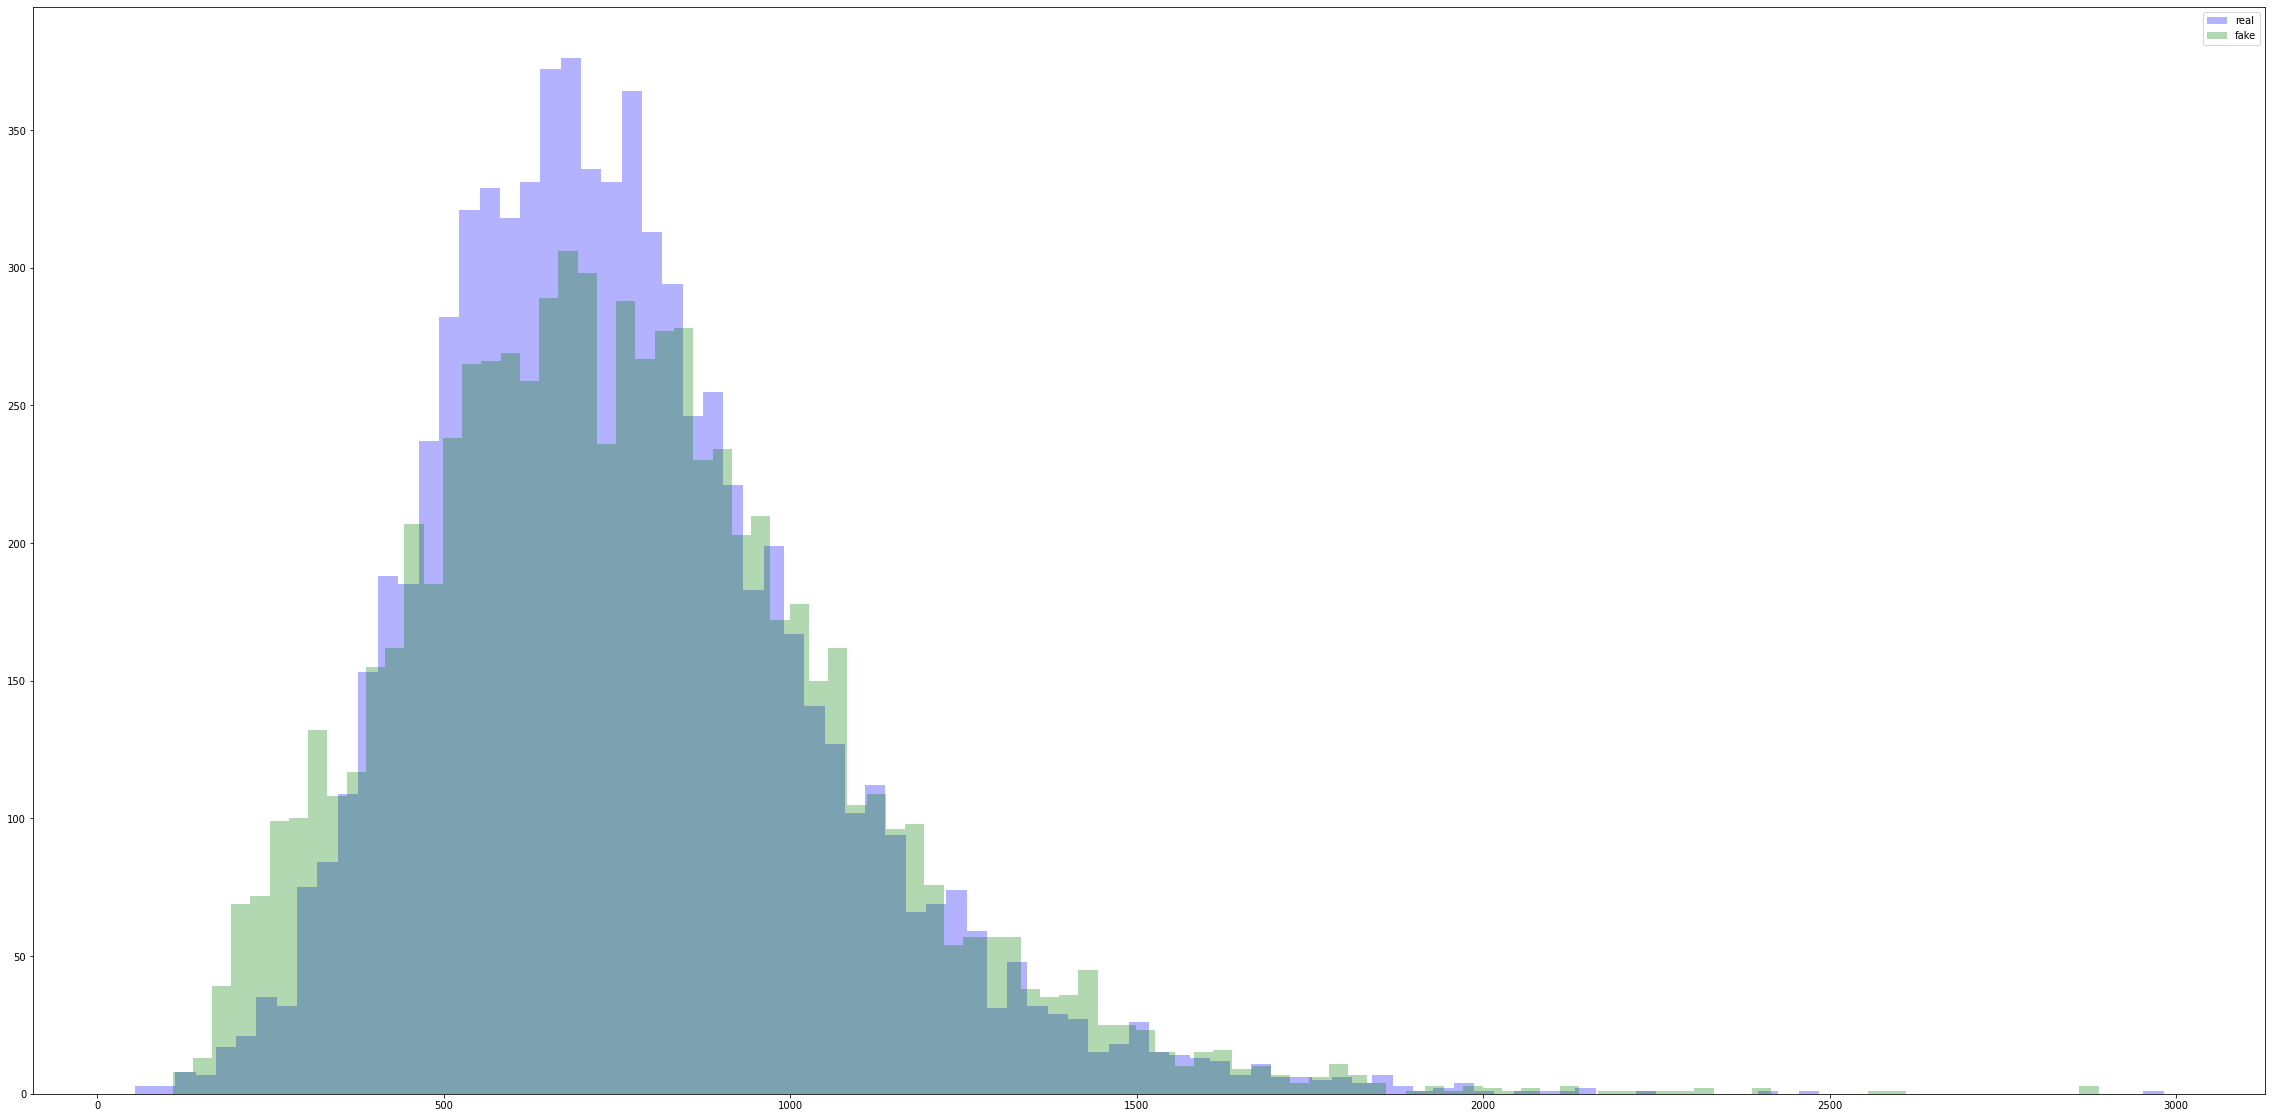

In [10]:
fig , ax = plt.subplots(1, 1, figsize = (40,20), sharey=True)
#labels =['Data scientist', 'Machine learning engineer', 'Software engineer', 'Consultant'] 
colors = ["blue","green"]
labels = ["real", "fake"]
bins = 100

for i, l in enumerate(labels):
    ax.hist(train[train["label_fnn"]==l]["length"],bins=bins,alpha=0.3, color=colors[i], label=labels[i]) 
    ax.legend(loc=0)

In [6]:
fake = train[train["label_fnn"]=='fake']
real = train[train["label_fnn"]=="real"]

In [14]:
fake["speaker"].value_counts()

Donald Trump        520
Facebook posts      450
Viral image         311
Bloggers            278
Chain email         153
                   ... 
Dean Wright           1
Michael Sullivan      1
Michael Roberson      1
Tom  Corbett          1
Mark Assini           1
Name: speaker, Length: 2310, dtype: int64

In [15]:
real["speaker"].value_counts()

Barack Obama              326
Donald Trump              198
Hillary Clinton           142
Bernie Sanders            109
Scott Walker               97
                         ... 
Xavier Becerra              1
General Beauregard Lee      1
Gabrielle Giffords          1
Senate Democrats            1
Nancy Jester                1
Name: speaker, Length: 2570, dtype: int64

In [11]:
fake_sentences = fake["fullText_based_content"].tolist()

In [12]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000)  # 出現頻度上位{num_words}だけを用いる
tokenizer.fit_on_texts(fake_sentences)
print(list(tokenizer.word_index)[:10] ) # 学習された辞書（出現頻度順）


['the', 'to', 'of', 'a', 'in', 'and', 'that', 'for', 'is', 'on']


In [13]:
print(list(tokenizer.word_index)[:100] )

['the', 'to', 'of', 'a', 'in', 'and', 'that', 'for', 'is', 'on', 'said', 'it', 'was', 'as', 'by', 'not', 'we', 'with', 'he', 'from', 'but', 'at', 'have', 'an', 'are', 'be', 'about', 'has', 'this', 'or', 'would', 'his', 'state', 'they', 'more', 'who', 'percent', 'one', 'were', 'which', 'than', 'tax', 'so', 'if', 'had', 'when', 'no', 'their', 'people', 'other', 'i', 'you', 'been', 'there', 'health', 'what', 'out', 'also', 'law', 'all', 'year', 'up', 'new', 'some', 's', 'u', 'claim', 'our', 'its', 'will', 'obama', 'president', 'states', 'did', 'she', 'bill', 'million', 'years', 'trump', 'those', 'federal', 'two', '000', 'us', 'campaign', 'because', 'any', 'time', 'government', 'after', 'news', 'care', '1', 'over', 'house', 'could', 'can', 'it’s', 'first', 'only']


In [19]:
import string 

def remove_punct(text):
  table = str.maketrans('', '', string.punctuation)
  return text.translate(table)

In [21]:
train["full_text"] = train["fullText_based_content"].apply(remove_punct)

In [22]:
def create_corpus(target):
  corpus = []

  for x in train[train["label_fnn"]==target]["full_text"].str.split():
    for i in x:
      corpus.append(i)
  
  return corpus 

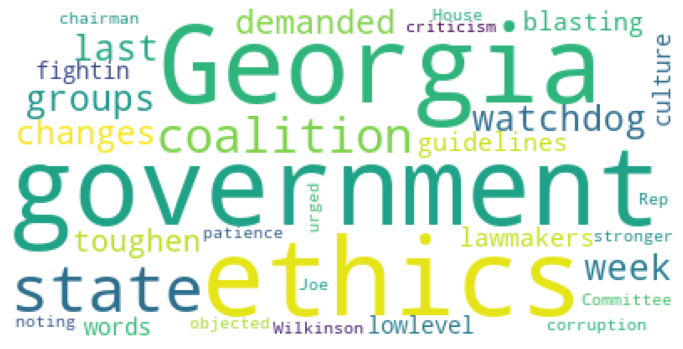

In [27]:
from wordcloud import WordCloud
 
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='white',
                          max_font_size = 80
                         ).generate(" ".join(create_corpus("fake")[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

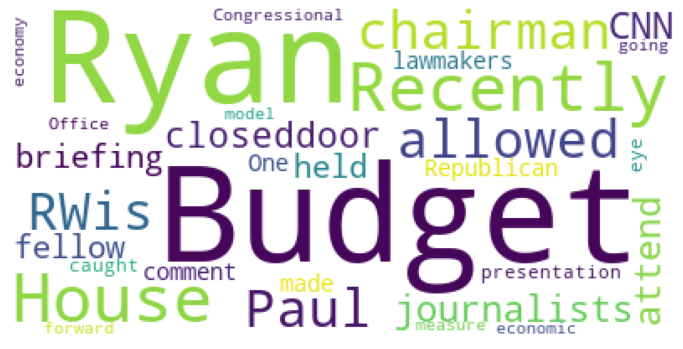

In [26]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='white',
                          max_font_size = 80
                         ).generate(" ".join(create_corpus("real")[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [41]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
  count_vectorizer = CountVectorizer()

  emb = count_vectorizer.fit_transform(data)

  return emb, count_vectorizer 

list_corpus = train["full_text"].tolist()

def encode(label):
  if label == "fake":
    return 1
  elif label == "real":
    return 0 

#list_labels = train["label_fnn"].tolist() 


In [42]:
train['flg'] = train["label_fnn"].apply(encode)
list_labels = train['flg'].tolist() 

print(list_labels[0:10])

[1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [43]:
counts, count_vectorizer = cv(list_corpus)

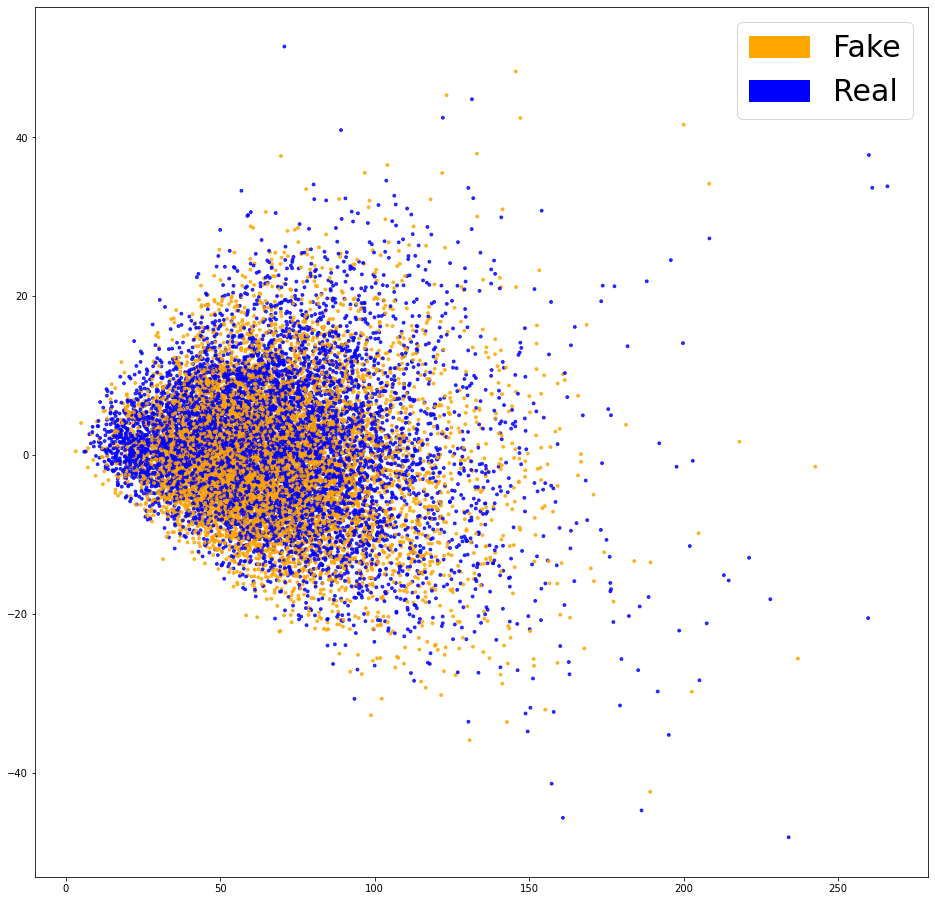

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Fake')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(counts, list_labels)
plt.show()

In [45]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

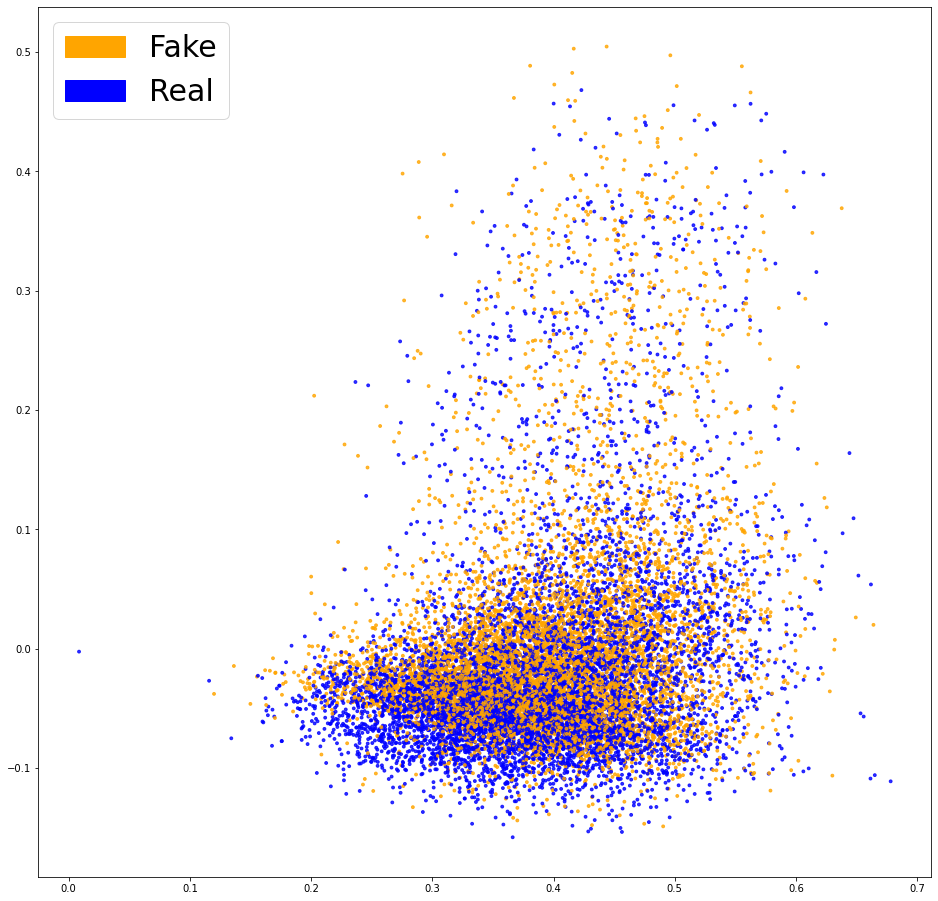

In [46]:
X_train_tfidf, tfidf_vectorizer = tfidf(train["full_text"])
#X_test_tfidf = tfidf_vectorizer.transform(X_test)

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, list_labels)
plt.show()
